# N-Body Problem and Symplectic Integrators
> Author: Gil Miranda Neto<br>
> Contact: gilsmneto@gmail.com<br>
> Repo: [@mirandagil](https://github.com/mirandagil/university-courses/analise-numerica-edo-2019-1/project)<br>
   
`last update: 30/05/2019`

---

In [1]:
import time

## --- Body class
from local_body import *

## --- Functions to simulate and plot
import local_functions as sim

### Initializing the celestial bodies
#### Setting Initial Values

In [27]:
sun = Body('Sun', 'yellow')
sun.mass = 1.98855e30
sun.size = 20

earth = Body('Earth', 'darkblue')
earth.mass = 5.9742e24
earth.p_x0 = 152.1e9
earth.v_y0 = 29.783e3
earth.size = 1

venus = Body('Venus', 'salmon')
venus.mass = 4.8685e24
venus.p_x0 = 108.9e9
venus.v_y0 = -35.02e3
venus.size = 0.95
    
mercury = Body('Mercury', 'darkmagenta')
mercury.mass = 0.3e24
mercury.p_x0 = 69.8e9
mercury.v_y0 = 47.7e3
mercury.size = 0.38
    
mars = Body('Mars', 'r')
mars.mass = 0.642e24
mars.p_x0 = 249.2e9
mars.v_y0 = 24.1e3
mars.size = 0.53
    
jupiter = Body('Jupiter', 'orangered')
jupiter.mass = 1.898e27
jupiter.p_x0 = 816.6e9
jupiter.v_y0 = 13.1e3
jupiter.size = 11.2
    
saturn = Body('Saturn', 'maroon')
saturn.mass = 5.68e26
saturn.p_x0 = 1514.5e9
saturn.v_y0 = 9.7e3
saturn.size = 9.45
    
uranus = Body('Uranus', 'darkgreen')
uranus.mass = 8.6e25
uranus.p_x0 = 3003.6e9
uranus.v_y0 = 6.8e3
uranus.size = 4
    
neptune = Body('Neptune', 'navy')
neptune.mass = 1.02e26
neptune.p_x0 = 4545.7e9
neptune.v_y0 = 5.4e3
neptune.size = 3.8
    
halley = Body('Halley', 'white')
halley.mass = 1.02e14
halley.p_x0 = 5248.2672e9
halley.v_y0 = 1e3

pluto = Body('Pluto', 'magenta')
pluto.mass = 0.0146e24
pluto.p_x0 = 737.9e9
pluto.v_y0 = 4.7e3

---
### List with bodies object

Separated in: Full solar system, Inner Solar System, Inner + Jupiter, Outter Solar System

In [3]:
bodies = [sun, mercury, venus, earth, mars, jupiter, saturn, uranus, neptune]
bodies_jp = [sun, earth, venus, mars, mercury, jupiter]
bodies_inner = [sun, earth, venus, mars, mercury]
bodies_outter = [sun, jupiter, saturn, uranus, neptune]

bodies_test = [sun, earth, mars]

---
### Setting List with the timesteps and methods to simulate

In [20]:
hs = [3600*24*7]
m = ['leapfrog']
period = 1000

#### Timer

In [21]:
start = time.time()

### Running Simulation #1

In [22]:
pos, vel, pot, ang_mo = sim.big_simulation(methods = m, t = period, steps = hs, bod = bodies)

### Calculating Momentum and Hamiltoniam

In [23]:
momentum_p = sim.momentum_calc(bodies, methods = m, hs = hs, vel_vec = vel, t = period)
potential_u = sim.potential_calc(bodies, methods = m, hs = hs, pot_vec = pot, t = period)
angular_m = sim.ang_mo_calc(bodies, methods = m, hs = hs, mo_vec = ang_mo, t = period)

### Plotting Hamiltoniam

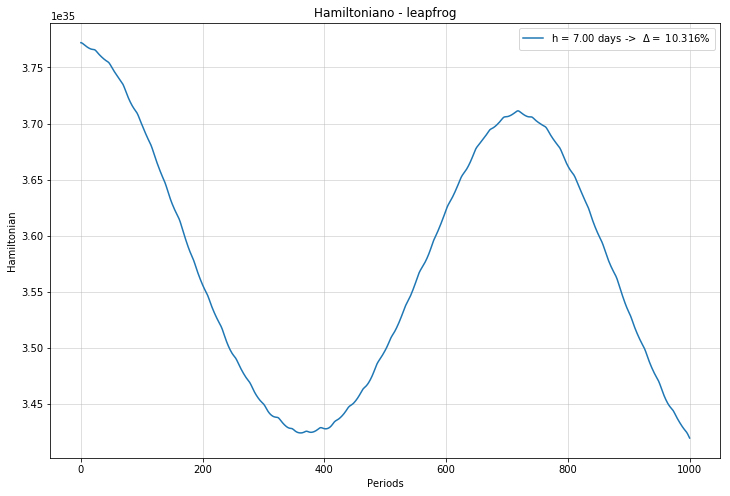

In [24]:
sim.big_plotter(methods = m, t = period, steps = hs, graph = ['hamilton'], opt = [bodies, 'The Inner Solar System'], pos_vec = pos, p_vec = potential_u, u_vec = momentum_p)

### Plotting Angular Momentum

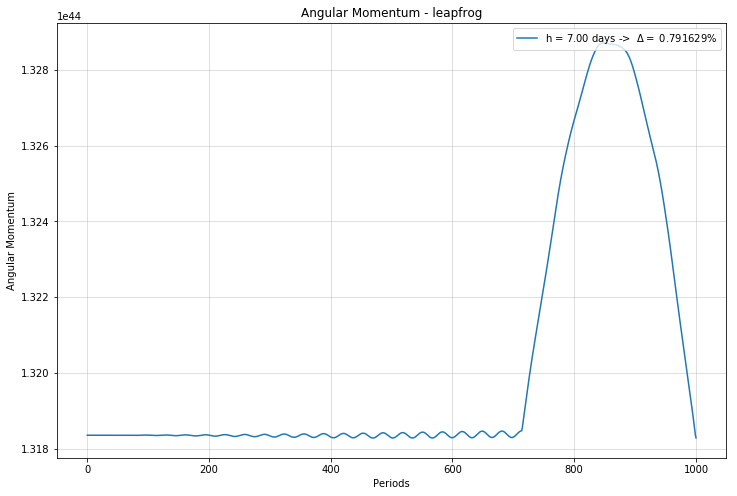

In [25]:
sim.big_plotter(methods = m, t = period, steps = hs, graph = ['momentum'], opt = [bodies, 'The Inner Solar System'], pos_vec = pos, ang_vec = angular_m)

### Plotting Inner Orbits

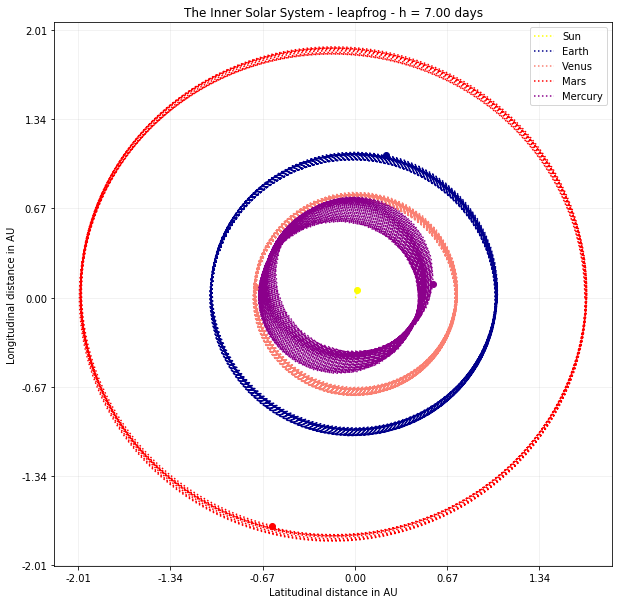

In [26]:
sim.big_plotter(methods = m, steps = hs, graph = ['orbit'], opt = [bodies_inner, 'The Inner Solar System'], pos_vec = pos)

### Plotting Outer Orbits

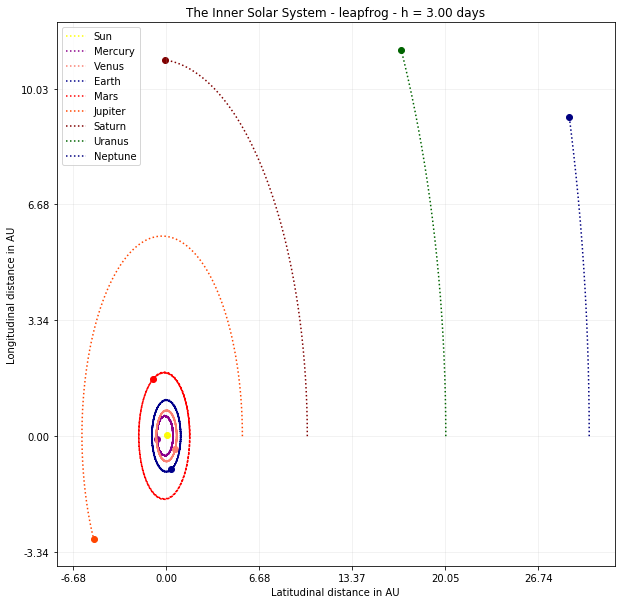

In [19]:
sim.big_plotter(methods = m, steps = hs, graph = ['orbit'], opt = [bodies, 'The Inner Solar System'], pos_vec = pos)

In [12]:
end = time.time()

In [13]:
print("A simulação levou %f segundos" % (end - start))

A simulação levou 181.901056 segundos


In [14]:
24000/60

400.0

In [80]:
sun = Body('Sun', 'black')
sun.mass = 1
sun.p_x0 = 1.38
sun.p_y0 = 0
sun.v_x0 = 0
sun.v_y0 = 0.584


planet = Body('Planet', 'purple')
planet.mass = 1
planet.p_x0 = 0
planet.p_y0 = 0.15
planet.v_x0 = 1.87
planet.v_y0 = 0.01

planet2 = Body('Planet 2', 'red')
planet2.mass = 1
planet2.p_x0 = -1.38
planet2.p_y0 = 0
planet2.v_x0 = 0
planet2.v_y0 = -0.584

planet2 = Body('Planet 3', 'red')
planet2.mass = 1
planet2.p_x0 = 0
planet2.p_y0 = -0.15
planet2.v_x0 = -1.87
planet2.v_y0 = 0

hs = [0.0025]
period = 30000

In [81]:
pos, vel, pot, ang_mo = sim.big_simulation(methods = ['leapfrog'], t = period, steps = hs, bod = [sun, planet, planet2])

In [82]:
pos, _, _, _ = sim.simulate([sun, planet, planet2], step = hs[0], period = period, method = 'leapfrog', G = 0.01)

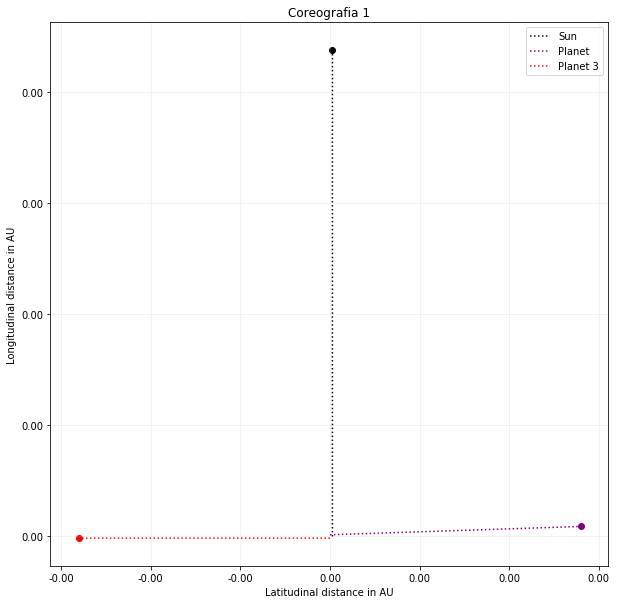

In [83]:
sim.orbit_plotter(pos, [sun, planet, planet2], title = 'Coreografia 1', scale = False, color = False)

In [18]:
hs = [7200]
m = ['euler', 'leapfrog']
period = 10000
bodies = [sun, earth, venus, mars]

In [19]:
pos, vel, pot, ang_mo = sim.big_simulation(methods = m, t = period, steps = hs, bod = bodies)

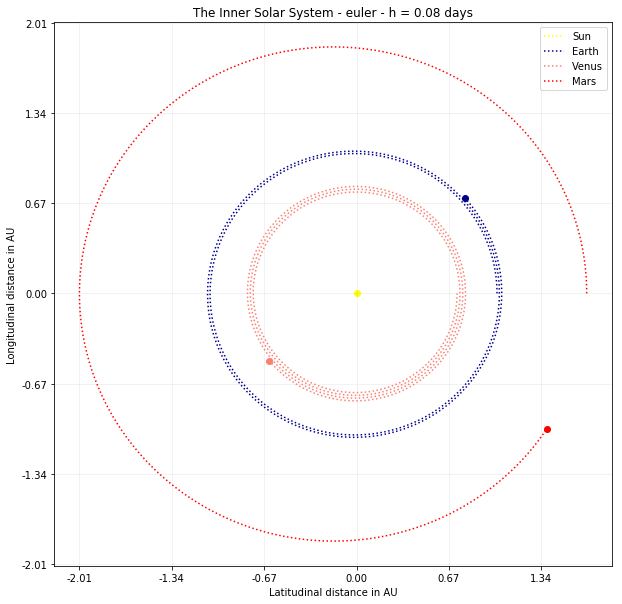

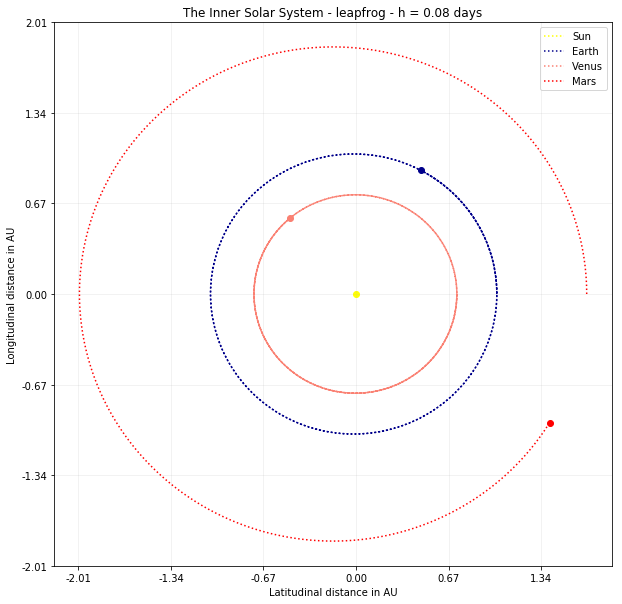

In [20]:
sim.big_plotter(methods = m, steps = hs, graph = ['orbit'], opt = [bodies, 'The Inner Solar System'], pos_vec = pos)

In [199]:
planet1 = Body('Planet 1', 'red')
planet1.mass = 2e29
planet1.p_x0 = 35e9
planet1.p_v0 = 20e2 

planet2 = Body('Planet 2', 'darkblue')
planet2.mass = 6e24
planet2.p_x0 = 150e9
planet2.v_y0 = 45e2

planet3 = Body('Planet 3', 'green')
planet3.mass = 6e24
planet3.p_x0 = -150e9
planet3.v_y0 = 29e2

In [200]:
hs = [3600*24]
bodies = [planet1, planet2, planet3]
m = ['leapfrog']
period = 1000

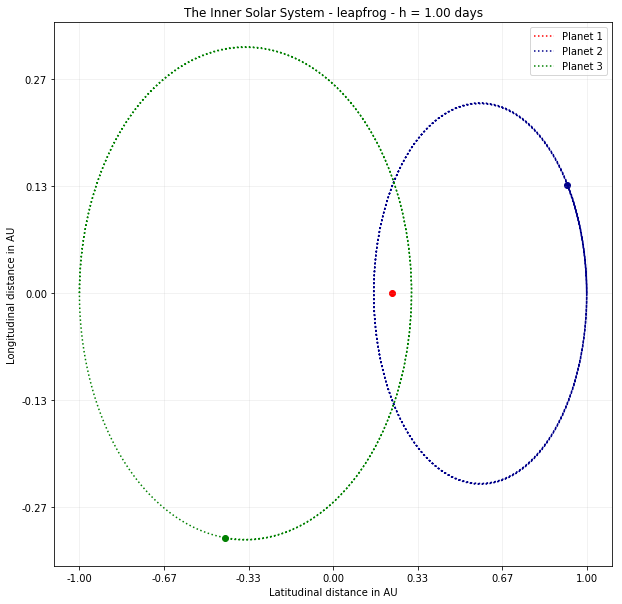

In [201]:
pos, vel, pot, ang_mo = sim.big_simulation(methods = m, t = period, steps = hs, bod = bodies)
sim.big_plotter(methods = m, t = period, steps = hs, graph = ['orbit'], opt = [bodies, 'The Inner Solar System'], pos_vec = pos, p_vec = potential_u, u_vec = momentum_p)

In [307]:
earth2 = Body('Planet 1', 'blue')
earth2.mass = 2e30
earth2.p_x0 = 0
earth2.p_v0 = 0

moon = Body('Planet 2', 'gray')
moon.mass = 7e22
moon.p_x0 = 150e9+0.384e9
moon.v_y0 = 1e3

planet3 = Body('Planet 3', 'green')
planet3.mass = 6e24
planet3.p_x0 = -150e9
planet3.v_y0 = 29.8e3

In [308]:
hs = [3600]
bodies = [earth2, planet3, moon]
m = ['euler']
period = 10000

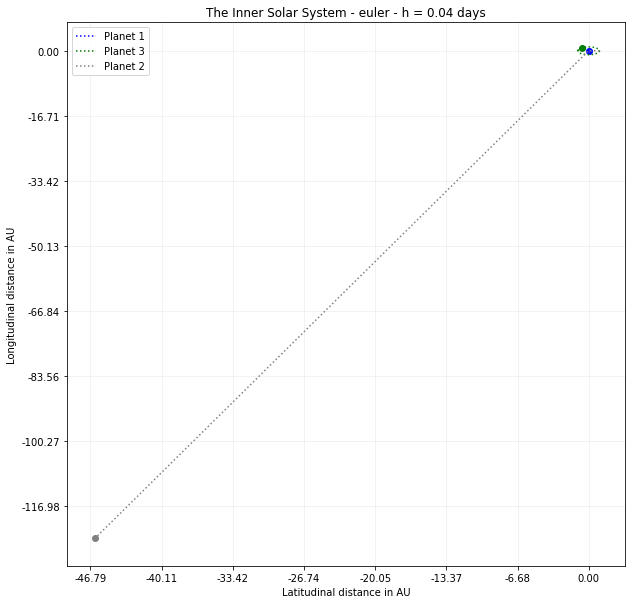

In [309]:
pos, vel, pot, ang_mo = sim.big_simulation(methods = m, t = period, steps = hs, bod = bodies)
sim.big_plotter(methods = m, t = period, steps = hs, graph = ['orbit'], opt = [bodies, 'The Inner Solar System'], pos_vec = pos, p_vec = potential_u, u_vec = momentum_p)